<a href="https://colab.research.google.com/github/KJOELJOYSON2427/NLP_SENTIMENTAL_ANALYSIS/blob/main/DocumentClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [20]:
df_movies = pd.read_csv('/content/movies.csv')
df_movies.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [14]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

In [15]:
spacy_nlp

In [17]:
#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [18]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
     #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    return tokens

# Example usage with a sample string:
sample_text = "This ?    is a sample sentence to test the spacy tokenizer."
print(spacy_tokenizer(sample_text))

['sample', 'sentence', 'test', 'spacy', 'tokenizer']


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-172386797.py:7: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub('\w*\d\w*','',sentence)


In [24]:
print ('Cleaning and Tokenizing...')
df_movies['wiki_plot_tokenized'] = df_movies['wiki_plot'].map(lambda x : spacy_tokenizer(x))

df_movies.head()

Cleaning and Tokenizing...


,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wed, vito, corleone, hear, req..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


In [25]:
movie_plot = df_movies['wiki_plot_tokenized']
movie_plot[0:5]

,wiki_plot_tokenized
0,"[day, daughter, wed, vito, corleone, hear, req..."
1,"[banker, andy, dufresne, convict, murder, wife..."
2,"[germans, polish, jews, kraków, ghetto, world,..."
3,"[brief, scene, age, overweight, italian, ameri..."
4,"[early, december, american, expatriate, rick, ..."


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
series =pd.Series(np.concatenate(movie_plot)).value_counts()[:100]

In [32]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

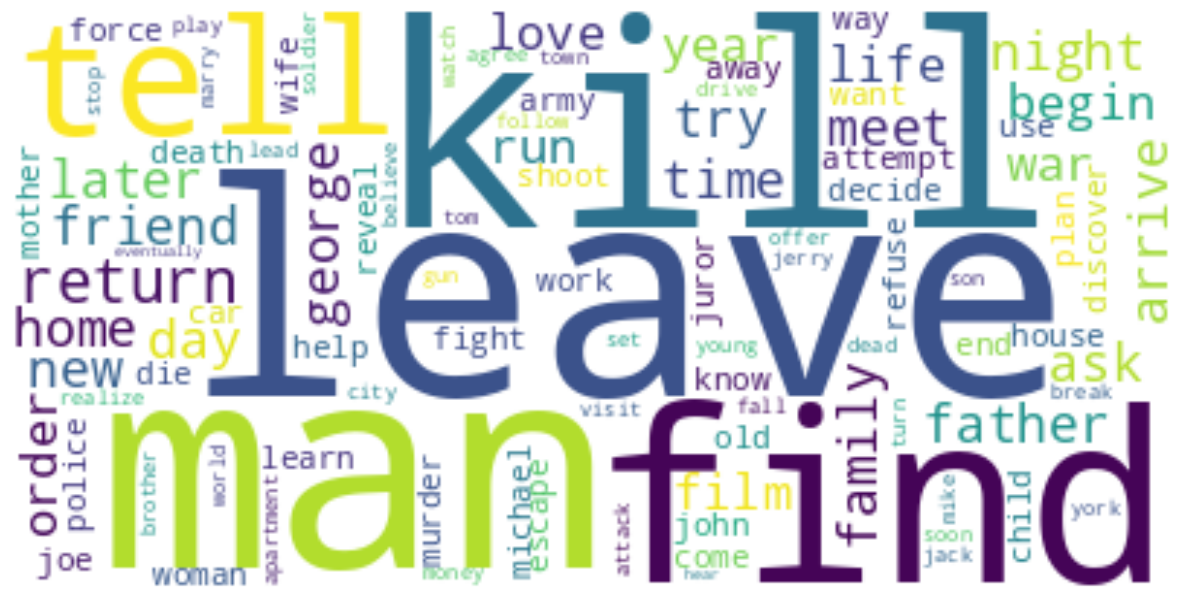

In [34]:
plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(movie_plot)

CPU times: user 48.5 ms, sys: 908 µs, total: 49.4 ms
Wall time: 49.1 ms


In [ ]:
#dictionary.filter_extremes(no_below=4, no_above=0.2)
#dictionary.dfs

In [45]:
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]

In [47]:
dictionary.filter_tokens(stop_ids)

In [51]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

AttributeError: 'list' object has no attribute 'size'

In [53]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]


In [59]:
corpus
for line in corpus[0:3]:
  for id, frequency in line:
    print(id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
4
21
39
73
75
81
89
100
103
107
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
8
19
20
28
39
84
105
113
121
127
137
145
146
173
174
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
2

In [55]:
word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

In [61]:
print(word_frequencies[0], "/n/n",word_frequencies[1])

[('abuse', 4), ('accuse', 2), ('act', 2), ('add', 2), ('address', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('arrange', 2), ('assassination', 4), ('associate', 2), ('authority', 2), ('aware', 2), ('baron', 2), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bomb', 2), ('brother', 6), ('business', 6), ('buy', 2), ('captain', 2), ('career', 2), ('christmas', 2), ('collapse', 2), ('command', 2), ('confess', 2), ('connection', 2), ('contact', 2), ('crime', 2), ('deal', 2), ('deny', 2), ('devastate', 2), ('don', 11), ('drug', 6), ('eld', 2), ('emerge', 2), ('erupt', 2), ('fade', 2), ('fear', 2), ('fish', 4), ('funeral', 2), ('garden', 2), ('girlfriend', 2), ('heroin', 2), ('highway', 2), ('hit', 2), ('hospital', 4), ('husband', 2), ('injury', 2), ('insist', 2), ('insult', 2), ('intend', 2), ('introduce', 2), ('investment', 2), ('involvement', 4), ('jack', 3), ('johnny', 3), ('kidnap', 2), ('land', 2), ('law', 2), ('los', 2), ('marine', 3), ('meeting', 4), ('michael', 31), ('michaels',

In [67]:
movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)
movie_lsi_model

In [68]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: user 62.2 ms, sys: 2.97 ms, total: 65.2 ms
Wall time: 74.7 ms
CPU times: user 78.5 ms, sys: 0 ns, total: 78.5 ms
Wall time: 81.4 ms


In [69]:
#Load the indexed corpus
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(100 documents, 1436 features, 10614 non-zero entries)
MmCorpus(100 documents, 100 features, 10000 non-zero entries)


In [70]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: user 21.8 ms, sys: 56 µs, total: 21.8 ms
Wall time: 26.2 ms


In [72]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_movies['title'][movie[0]],
                'Movie Plot': df_movies['wiki_plot'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot'])


In [73]:
# search for movie tiles that are related to below search parameters
search_similar_movies('crime and drugs ')

,Relevance,Movie Title,Movie Plot
0,59.30,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
1,53.32,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
2,49.05,The French Connection,"In Marseille, an undercover detective is follo..."
3,29.99,The Godfather,"On the day of his only daughter's wedding, Vit..."
4,19.43,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...


In [74]:
# search for movie tiles that are related to below search parameters
search_similar_movies('violence protest march')

,Relevance,Movie Title,Movie Plot
0,69.64,Amadeus,The story begins in 1823 as the elderly Antoni...
1,41.66,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."
2,37.36,Gandhi,The screenplay of Gandhi is available as a pub...
3,29.86,The Wizard of Oz,The film starts in sepia-tinted Kansas in the ...
4,20.87,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
